# 환경설정

In [50]:
import os
import pydotplus
from IPython.display import Image

import warnings         # 파이썬 경고문을 안 보여주는 코드
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 데이터 불러오기

In [51]:
df = pd.read_csv("../data/soccer.csv")
df.head()

,HomeTeam,AwayTeam,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Everton,Arsenal,0,0,3,0,8,15,5,9,11,13,4,9,0,0,0,0
1,Tottenham,Liverpool,2,1,0,2,17,6,11,3,14,16,6,5,3,3,0,0
2,ManU,Arsenal,2,0,1,0,10,9,4,3,21,15,6,5,3,6,0,0
3,ManC,Arsenal,2,1,0,2,10,19,6,9,13,12,3,12,3,2,0,0
4,Tottenham,ManU,0,1,2,0,11,17,7,13,16,13,3,9,3,2,0,1


# HomeTeam , AwayTeam

In [52]:
df.columns

Index(['HomeTeam', 'AwayTeam', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST',
       'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [53]:
# HomeTeam/AwayTeam 원-핫 인코딩
df = pd.get_dummies(data=df, columns=['HomeTeam'], prefix = 'H')
df = pd.get_dummies(data=df, columns=['AwayTeam'], prefix = 'A')

In [54]:
df.columns

Index(['FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'H_Arsenal', 'H_Chelsea',
       'H_Everton', 'H_Liverpool', 'H_ManC', 'H_ManU', 'H_Tottenham',
       'A_Arsenal', 'A_Chelsea', 'A_Everton', 'A_Liverpool', 'A_ManC',
       'A_ManU', 'A_Tottenham'],
      dtype='object')

# Train_test_split

In [55]:
feature = df.columns.drop('FTR')
label = ['FTR']

In [56]:
x_train , x_test, y_train, y_test = train_test_split(df[feature], df[label], test_size=0.3 , stratify= df['FTR'], random_state=2109031430)

In [57]:
# 종속변수 비율 확인
print(y_train['FTR'].value_counts()/len(y_train))
print("-----------------------------------------")
print(y_test['FTR'].value_counts()/len(y_test))

2    0.493197
1    0.282313
0    0.224490
Name: FTR, dtype: float64
-----------------------------------------
2    0.500000
1    0.277778
0    0.222222
Name: FTR, dtype: float64


In [58]:
x_train.reset_index(inplace = True , drop = True)
y_train.reset_index(inplace = True , drop = True)
x_test.reset_index(inplace = True , drop = True)
y_test.reset_index(inplace = True , drop = True)

# 분석

## RandomForestClassifier

In [59]:
forest_clf = RandomForestClassifier(random_state=2109031430 , max_depth = 3)

forest_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, random_state=2109031430)

### Train 정확도

In [60]:
y_pred = forest_clf.predict(x_train)

print( "train 정확도 : {:0.2f}".format(accuracy_score(y_train , y_pred)))

train 정확도 : 0.74


### 테스트 정확도

In [61]:
y_pred = forest_clf.predict(x_test)

print( "test 정확도 : {:0.2f}".format(accuracy_score(y_test , y_pred)))

test 정확도 : 0.66


### 혼돈 행렬

In [62]:
# 행 : 실제 값 , 열 : 예측 값
y_pred = forest_clf.predict(x_test)

cf = confusion_matrix(y_test, y_pred)
print(cf)

[[21  5  2]
 [ 6  9 20]
 [ 4  6 53]]


In [63]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[88, 10],
        [ 7, 21]],

       [[80, 11],
        [26,  9]],

       [[41, 22],
        [10, 53]]], dtype=int64)

In [64]:
print(classification_report(y_test , y_pred , target_names = ["패" , "무" , "승"]))

              precision    recall  f1-score   support

           패       0.68      0.75      0.71        28
           무       0.45      0.26      0.33        35
           승       0.71      0.84      0.77        63

    accuracy                           0.66       126
   macro avg       0.61      0.62      0.60       126
weighted avg       0.63      0.66      0.63       126



## 의사결정나무

In [65]:
dt_clf = DecisionTreeClassifier(random_state=2109031430 , max_depth = 2)

dt_clf = dt_clf.fit(x_train, y_train)

### Train 정확도

In [66]:
y_pred = dt_clf.predict(x_train)

print( "train 정확도 : {:0.2f}".format(accuracy_score(y_train , y_pred)))

train 정확도 : 0.66


### 테스트 정확도

In [67]:
y_pred = dt_clf.predict(x_test)

print( "test 정확도 : {:0.2f}".format(accuracy_score(y_test , y_pred)))

test 정확도 : 0.65


### 혼동행렬

In [68]:
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[20  7  1]
 [ 6 23  6]
 [ 1 23 39]]


In [69]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[91,  7],
        [ 8, 20]],

       [[61, 30],
        [12, 23]],

       [[56,  7],
        [24, 39]]], dtype=int64)

In [70]:
print(classification_report(y_test , y_pred , target_names = ["패" , "무" , "승"]))

              precision    recall  f1-score   support

           패       0.74      0.71      0.73        28
           무       0.43      0.66      0.52        35
           승       0.85      0.62      0.72        63

    accuracy                           0.65       126
   macro avg       0.67      0.66      0.66       126
weighted avg       0.71      0.65      0.66       126



### 시각화

In [71]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

In [72]:
feature_names = x_test.columns.tolist()

In [73]:
feature_names = feature_names

In [74]:
target_name = np.array(['HOME_Defeat', 'HOME_tie' , 'HOME_WIN'])

In [75]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

In [76]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

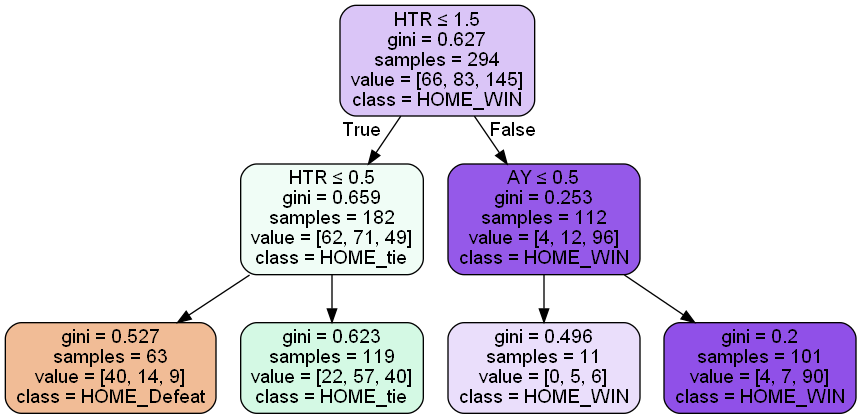

In [77]:
Image(dt_graph.create_png())

## Gradient Boosting Model

In [78]:
gbc = GradientBoostingClassifier(random_state=2109031430) # 기본값: max_depth=3, learning_rate=0.1

gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=2109031430)

### Train 정확도

In [79]:
y_pred = gbc.predict(x_train)
score_train = accuracy_score(y_train , y_pred)
print( "train 정확도 : {:0.2f}".format(accuracy_score(y_train , y_pred)))

train 정확도 : 1.00


### 테스트 정확도

In [80]:
y_pred = gbc.predict(x_test)
score_test = accuracy_score(y_test , y_pred)
print( "test 정확도 : {:0.2f}".format(accuracy_score(y_test , y_pred)))

test 정확도 : 0.68


### 과적합 방지

#### V1

In [81]:
# overfitting을 막기 위해 트리의 깊이를 줄여 pre-pruning(가지치기)을 강하게 진행
gbc = GradientBoostingClassifier(random_state=2109031430, max_depth=1)

gbc.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=1, random_state=2109031430)

In [82]:
y_pred = gbc.predict(x_train)
score_train_pre = accuracy_score(y_train , y_pred)
print( "train 정확도 : {:0.2f}".format(accuracy_score(y_train , y_pred)))

train 정확도 : 0.77


In [83]:
y_pred = gbc.predict(x_test)
score_test_pre = accuracy_score(y_test , y_pred)
print( "test 정확도 : {:0.2f}".format(accuracy_score(y_test , y_pred)))

test 정확도 : 0.62


#### 혼동행렬

In [84]:
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[18  7  3]
 [ 6 17 12]
 [ 7 13 43]]


In [85]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[85, 13],
        [10, 18]],

       [[71, 20],
        [18, 17]],

       [[48, 15],
        [20, 43]]], dtype=int64)

In [86]:
print(classification_report(y_test , y_pred , target_names = ["패" , "무" , "승"]))

              precision    recall  f1-score   support

           패       0.58      0.64      0.61        28
           무       0.46      0.49      0.47        35
           승       0.74      0.68      0.71        63

    accuracy                           0.62       126
   macro avg       0.59      0.60      0.60       126
weighted avg       0.63      0.62      0.62       126



#### V2

In [87]:
# learning_rate 조절하여 overfitting을 해결
gbc = GradientBoostingClassifier(random_state=2109031430 , learning_rate=0.003) # 기본값 0.1

gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.003, random_state=2109031430)

In [88]:
y_pred = gbc.predict(x_train)
score_train_lr = accuracy_score(y_train , y_pred)
print( "train 정확도 : {:0.2f}".format(accuracy_score(y_train , y_pred)))

train 정확도 : 0.62


In [89]:
y_pred = gbc.predict(x_test)
score_test_lr = accuracy_score(y_test , y_pred)
print( "test 정확도 : {:0.2f}".format(accuracy_score(y_test , y_pred)))

test 정확도 : 0.58


#### 혼동행렬

In [90]:
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[12  0 16]
 [ 1  3 31]
 [ 1  4 58]]


In [91]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[96,  2],
        [16, 12]],

       [[87,  4],
        [32,  3]],

       [[16, 47],
        [ 5, 58]]], dtype=int64)

In [92]:
print(classification_report(y_test , y_pred , target_names = ["패" , "무" , "승"]))

              precision    recall  f1-score   support

           패       0.86      0.43      0.57        28
           무       0.43      0.09      0.14        35
           승       0.55      0.92      0.69        63

    accuracy                           0.58       126
   macro avg       0.61      0.48      0.47       126
weighted avg       0.59      0.58      0.51       126



#### 확인

In [93]:
score_set = np.round([score_train, score_test], 3)
max_depth_score_set = np.round([score_train_pre, score_test_pre], 3)
learning_rete_score_set = np.round([score_train_lr, score_test_lr], 3)

index = np.arange(len(score_set))
bar_width = 0.35
bottom = 0.5

list_set = [max_depth_score_set, learning_rete_score_set]
line_set = ['--', ':']
names = ['train', 'test']

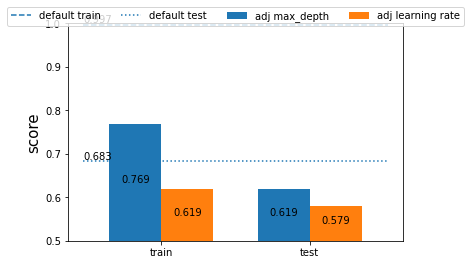

In [94]:
for i, line_set, name in zip(index, line_set, names):
    plt.hlines(score_set[i], xmin=0-bar_width,
               xmax=index[-1]+2*bar_width,
               linestyle=line_set, label='default {}'.format(name))
    plt.text(0-bar_width, score_set[i]+0.005, str(score_set[i]))

plt.bar(index, max_depth_score_set, width=bar_width, label='adj max_depth')
plt.bar(index+bar_width, learning_rete_score_set, width=bar_width, label='adj learning rate')

for i, ts, te in zip(index, max_depth_score_set, learning_rete_score_set):
    plt.text(i, (bottom+ts)/2, str(ts), horizontalalignment='center')
    plt.text(i+bar_width, (bottom+te)/2, str(te), horizontalalignment='center')

plt.ylim(bottom, 1)
plt.xticks(index+bar_width/2, names)
plt.ylabel('score', size=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, fancybox=True, shadow=False)
plt.show()